In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import json
from tqdm import tqdm, tqdm_notebook

In [40]:
df = pd.read_csv('./data_ratebeer_withReview.csv')
df.head()

,name,score,beer style,abv,cal,city,country,link,id,reviews
0,Ivanych Zhivoe Svetloe,2.84,Zwickel/Keller/Landbier,4.5,135.0,Sukhum,Abkhazia,/beer/ivanych-zhivoe-svetloe/301247/,301247,Bottle. Clear deep golden colour. Moderate whi...
1,Stara Praha Oldenburg Tiemnoye,2.52,Dunkel/Tmavý,4.7,141.0,Stara Gagra,Abkhazia,/beer/stara-praha-oldenburg-tiemnoye/334787/,334787,Bottle thanks to zwr. Cloudy amber beer with a...
2,Stara Praha Oldenburg Svetloe,2.51,Pale Lager,4.7,141.0,Stara Gagra,Abkhazia,/beer/stara-praha-oldenburg-svetloe/334785/,334785,Вполне обычный лагер. Пробова& пиво когда заез...
3,Stara Praha Oldenburg Jantarnoye,2.49,Amber Lager/Vienna,4.5,135.0,Stara Gagra,Abkhazia,/beer/stara-praha-oldenburg-jantarnoye/334786/,334786,"Bottled (thanks omhper!). Golden colour, mediu..."
4,Assir Lager (Svetloe),2.37,Pale Lager,5.0,150.0,Alakhadzykh Village Gagra Region,Abkhazia,/beer/assir-lager-svetloe/191169/,191169,Bottled at Zappa Was Right tasting. Clear pal...


In [41]:
df_ch = df[df.country == 'Switzerland']

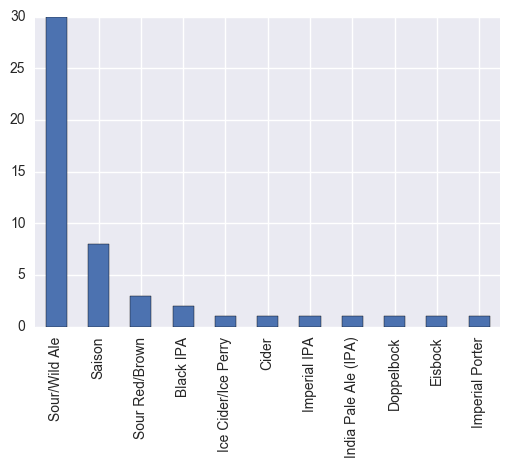

In [42]:
df_ch['beer style'].value_counts().plot(kind='bar')

In [43]:
df_ch_st = df_ch['beer style'].value_counts().reset_index()

In [44]:
st = df_ch_st['index'].tolist()
cnt = df_ch_st['beer style'].tolist()

In [45]:
pd.DataFrame({'name': st, 'count': cnt})

,count,name
0,30,Sour/Wild Ale
1,8,Saison
2,3,Sour Red/Brown
3,2,Black IPA
4,1,Ice Cider/Ice Perry
5,1,Cider
6,1,Imperial IPA
7,1,India Pale Ale (IPA)
8,1,Doppelbock
9,1,Eisbock


# Build JSON

In [72]:
countries = sorted(set(df.country))
len(countries)

207

In [79]:
countries[0]

'Abkhazia'

In [75]:
def get_beer_style(cntry):
    df_cntry = df[df.country == cntry]
    df_styles = df_cntry['beer style'].value_counts().reset_index()
    sty = df_styles['index'].tolist()
    cnt = df_styles['beer style'].tolist()
    df_ = pd.DataFrame({'name': sty, 'count': cnt})
    return df_

In [76]:
dd = get_beer_style('Switzerland')

In [81]:
dd.to_json('./styletest.json', orient='records')

In [83]:
with open('./styletest.json') as dfile:    
    dat = json.load(dfile)
dat

[{'count': 30, 'name': 'Sour/Wild Ale'},
 {'count': 8, 'name': 'Saison'},
 {'count': 3, 'name': 'Sour Red/Brown'},
 {'count': 2, 'name': 'Black IPA'},
 {'count': 1, 'name': 'Ice Cider/Ice Perry'},
 {'count': 1, 'name': 'Cider'},
 {'count': 1, 'name': 'Imperial IPA'},
 {'count': 1, 'name': 'India Pale Ale (IPA)'},
 {'count': 1, 'name': 'Doppelbock'},
 {'count': 1, 'name': 'Eisbock'},
 {'count': 1, 'name': 'Imperial Porter'}]

In [87]:
with open('./beer_styles.json','wt') as data_file: 
    lst_json = dict()
    countries = sorted(set(df.country))
    for idx_ in tqdm(range(0,len(countries))):
        df_s = get_beer_style(countries[idx_])
        df_s.to_json('./df_styles.json', orient='records')
        with open('./df_styles.json') as datfile:    
            data_json = json.load(datfile)
        #lst_json.append({name: data_json})
        lst_json[countries[idx_]] = data_json
    json.dump(lst_json,data_file)
    

100%|██████████| 207/207 [00:00<00:00, 218.99it/s]


In [88]:
with open('./beer_styles.json') as data_fil:
    data1 = json.load(data_fil)
data1

{'Abkhazia': [{'count': 3, 'name': 'Pale Lager'},
  {'count': 1, 'name': 'Amber Lager/Vienna'},
  {'count': 1, 'name': 'Zwickel/Keller/Landbier'},
  {'count': 1, 'name': 'Dunkel/Tmavý'}],
 'Albania': [{'count': 12, 'name': 'Pale Lager'},
  {'count': 9, 'name': 'Pilsener'},
  {'count': 3, 'name': 'Dunkel/Tmavý'},
  {'count': 2, 'name': 'Amber Lager/Vienna'},
  {'count': 2, 'name': 'Dunkler Bock'},
  {'count': 2, 'name': 'Oktoberfest/Märzen'},
  {'count': 2, 'name': 'Dortmunder/Helles'},
  {'count': 2, 'name': 'German Hefeweizen'},
  {'count': 2, 'name': 'Zwickel/Keller/Landbier'},
  {'count': 1, 'name': 'Czech Pilsner (Světlý)'},
  {'count': 1, 'name': 'Imperial Pils/Strong Pale Lager'},
  {'count': 1, 'name': 'Amber Ale'},
  {'count': 1, 'name': 'Golden Ale/Blond Ale'},
  {'count': 1, 'name': 'English Pale Ale'},
  {'count': 1, 'name': 'Brown Ale'},
  {'count': 1, 'name': 'Dunkelweizen'},
  {'count': 1, 'name': 'Wheat Ale'},
  {'count': 1, 'name': 'German Kristallweizen'}],
 'Algeria':